# cadCAD Experiment

In [1]:
import matplotlib.pyplot as plt
from model.run import run

df = run()

print(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 7, 1, 5)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.57s
     allocated_funds  unallocated_funds  \
8          18.595312          18.595312   
16         31.694708          31.694708   
24         36.259275          36.259275   
32         39.422671          39.422671   
40         39.445685          39.445685   
..               ...                ...   
688        38.742998         103.742998   
696        82.651649          90.984982   
704        58.346622          75.013289   
712         2.116887          52.116887   
720        54.881321          54.8

TODO: Insert Stock and Flow Diagram

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each Subcontractor eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [2]:
import pandas as pd
df1 = df.reset_index().subcontractors

subcontractor_holdings = {}
subcontractor_claimable = {}
subcontractor_holdings_plus_claimable = {}
timestep = 0
for subcontractor_dict in df1:
    for subcontractor_id, subcontractor in subcontractor_dict.items():
        if subcontractor_id not in subcontractor_holdings:
            subcontractor_holdings[subcontractor_id] = {}
            subcontractor_claimable[subcontractor_id] = {}
            subcontractor_holdings_plus_claimable[subcontractor_id] = {}
        subcontractor_holdings[subcontractor_id][timestep] = subcontractor.holdings
        subcontractor_claimable[subcontractor_id][timestep] = subcontractor.claimable_funds
        subcontractor_holdings_plus_claimable[subcontractor_id][timestep] = subcontractor.holdings + subcontractor.claimable_funds
        
    timestep += 1

Text(0, 0.5, 'subcontractor Holdings')

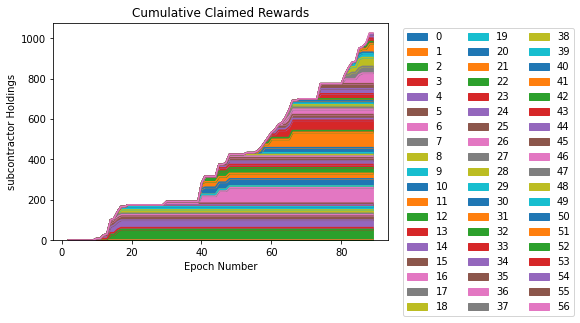

In [3]:


df_plot = pd.DataFrame(subcontractor_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Claimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('subcontractor Holdings')

# Cumulative Unclaimed Rewards

This shows that the rewards are all claimed eventually, and the unclaimed rewards do not grow unbounded which would represent a leak in the system.


Text(0, 0.5, 'subcontractor Claimable Funds')

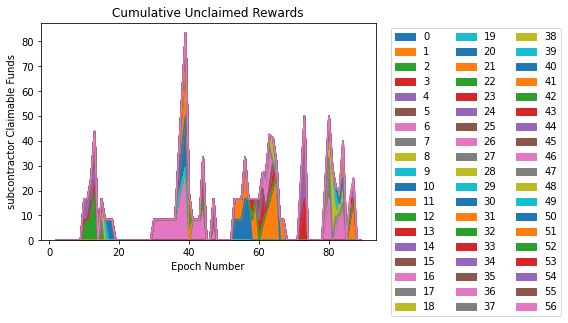

In [4]:
df_plot = pd.DataFrame(subcontractor_claimable)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Unclaimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('subcontractor Claimable Funds')

# Plot to show Claimed Rewards + Unclaimed Rewards
This shows a straight line is monotonically increasing rewards, as a sanity check that the amount of rewards per epoch is a constant.

Text(0, 0.5, 'subcontractor Claimable Funds')

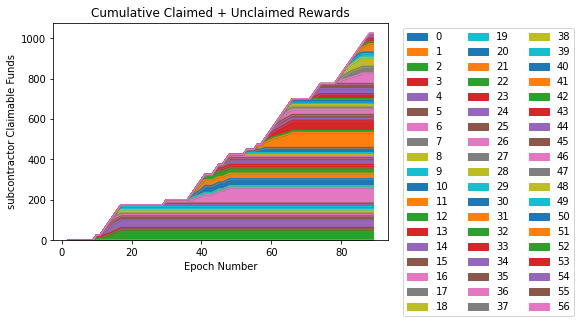

In [5]:
df_plot = pd.DataFrame(subcontractor_holdings_plus_claimable)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Claimed + Unclaimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('subcontractor Claimable Funds')


# Twinned x axis, Number of Member Brokers vs Total subcontractor Stake.  

This plot shows that each subcontractor has exactly $5 staked on average.




Text(0, 0.5, 'Total subcontractor Stake')

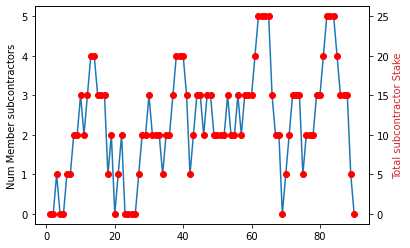

In [6]:
subcontractorfig, ax1 = plt.subplots()

ax1.plot(df.timestep, df.num_member_subcontractors, label='test1')
ax1.set_ylabel('Num Member subcontractors')
ax2 = ax1.twinx()
ax2.plot(df.timestep, df.total_subcontractor_stake, 'ro', label='test2')
ax2.set_ylabel('Total subcontractor Stake', color = 'tab:red')


In [7]:
df['members'] = df.subcontractors.apply(lambda x: [v.id for v in x.values() if v.member])

In [8]:
df.members

8                []
16               []
24              [0]
32               []
40               []
           ...     
688    [46, 51, 53]
696    [51, 53, 54]
704    [51, 54, 55]
712            [56]
720              []
Name: members, Length: 90, dtype: object

In [10]:
subcontractor_ids = [v.id for v in df.subcontractors.values[-1].values()]

In [12]:
df['subcontractor_stakes'] = df.subcontractors.apply(lambda x: [(v.member, v.stake) for v in x.values()])

In [13]:
def check(x):
    if x[0]:
        if x[1]==5:
            #return "member with correct stake"
            return True
        else:
            #return "member with incorrect stake"
            return False
    else:
        if x[1]==0:
            #return "nonmember with correct stake"
            return True
        else:
            #return "nonmember with incorrect stake"
            return False

In [14]:
df.subcontractor_stakes.apply(lambda z: [check(x) for x in z])  

8                                                     []
16                                                    []
24                                                [True]
32                                                [True]
40                                                [True]
                             ...                        
688    [True, True, True, True, True, True, True, Tru...
696    [True, True, True, True, True, True, True, Tru...
704    [True, True, True, True, True, True, True, Tru...
712    [True, True, True, True, True, True, True, Tru...
720    [True, True, True, True, True, True, True, Tru...
Name: subcontractor_stakes, Length: 90, dtype: object

In [15]:
df['subcontractor_based_total_stake'] = df.subcontractor_stakes.apply(lambda z: sum([x[1] for x in z if x[0]]))

In [16]:
df['subcontractor_based_total_stake']

8       0
16      0
24      5
32      0
40      0
       ..
688    15
696    15
704    15
712     5
720     0
Name: subcontractor_based_total_stake, Length: 90, dtype: int64